In [72]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

Korte beschrijving van de data uit het meegeleverde csv
patiënt-id: id van de patiënt
sex: M of V
leeftijd: leeftijd van de patiënt
lengte: centimeters
gewicht: kilogram
bovendruk: mmHg
onderdruk: mmHg
tv-per-dag: hoeveel uren televisie de patiënt gemiddeld per dag kijkt
beweging-per-dag: hoeveel uur de patiënt gemiddeld per week beweegt
slaapscore: sleepscore in fitbit-data; zie [3]
maandinkomen: in euro
hypertensie: of de patiënt last heeft van hypertensie of niet
bmi: body-mass-index
opleidingsniveau: conform de indeling van het CBS, zie [4]
astigmatisme: of de patiënt last heeft van astigmatisme of niet
MHS: of de patiënt lijdt aan het Mary Hart Syndroom of niet

In [73]:
data = pd.read_csv("competition-train(1).csv", skiprows=30)
data.head()

,idx,patiënt-id,sex,leeftijd,lengte,gewicht,bovendruk,onderdruk,tv-per-dag,beweging-per-week,slaapscore,maandinkomen,hypertensie,bmi,opleidingsniveau,astigmatisme,MHS
0,978,BFV2-0979,M,30.0,184,64,114.0,75,3,8.0,82.559178,4024.0,False,18.903592,HAVO/VWO/MBO2,True,False
1,806,BFV2-0807,M,48.0,169,82,127.0,82,5,10.0,58.244951,3546.0,False,28.710479,HAVO/VWO/MBO2,True,True
2,1337,BFV2-1338,M,28.0,175,58,110.0,83,2,9.0,20.000000,3744.0,False,18.938776,HAVO/VWO/MBO2,True,False
3,606,BFV2-0607,M,43.0,171,83,140.0,77,5,9.0,72.707249,3579.0,True,28.384802,Basisonderwijs/MBO1,True,True
4,701,BFV2-0702,V,48.0,175,79,125.0,77,4,6.0,53.912941,3197.0,False,25.795918,Basisonderwijs/MBO1,True,False


missing values has nan

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idx                960 non-null    int64  
 1   patiënt-id         960 non-null    object 
 2   sex                960 non-null    object 
 3   leeftijd           949 non-null    float64
 4   lengte             960 non-null    int64  
 5   gewicht            960 non-null    int64  
 6   bovendruk          912 non-null    float64
 7   onderdruk          960 non-null    int64  
 8   tv-per-dag         960 non-null    int64  
 9   beweging-per-week  938 non-null    float64
 10  slaapscore         960 non-null    float64
 11  maandinkomen       942 non-null    float64
 12  hypertensie        960 non-null    bool   
 13  bmi                947 non-null    float64
 14  opleidingsniveau   960 non-null    object 
 15  astigmatisme       960 non-null    bool   
 16  MHS                960 non

In [75]:
catagory_cols = ["opleidingsniveau", "sex"]
data[catagory_cols] = data[catagory_cols].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   idx                960 non-null    int64   
 1   patiënt-id         960 non-null    object  
 2   sex                960 non-null    category
 3   leeftijd           949 non-null    float64 
 4   lengte             960 non-null    int64   
 5   gewicht            960 non-null    int64   
 6   bovendruk          912 non-null    float64 
 7   onderdruk          960 non-null    int64   
 8   tv-per-dag         960 non-null    int64   
 9   beweging-per-week  938 non-null    float64 
 10  slaapscore         960 non-null    float64 
 11  maandinkomen       942 non-null    float64 
 12  hypertensie        960 non-null    bool    
 13  bmi                947 non-null    float64 
 14  opleidingsniveau   960 non-null    category
 15  astigmatisme       960 non-null    bool    
 16  MHS     

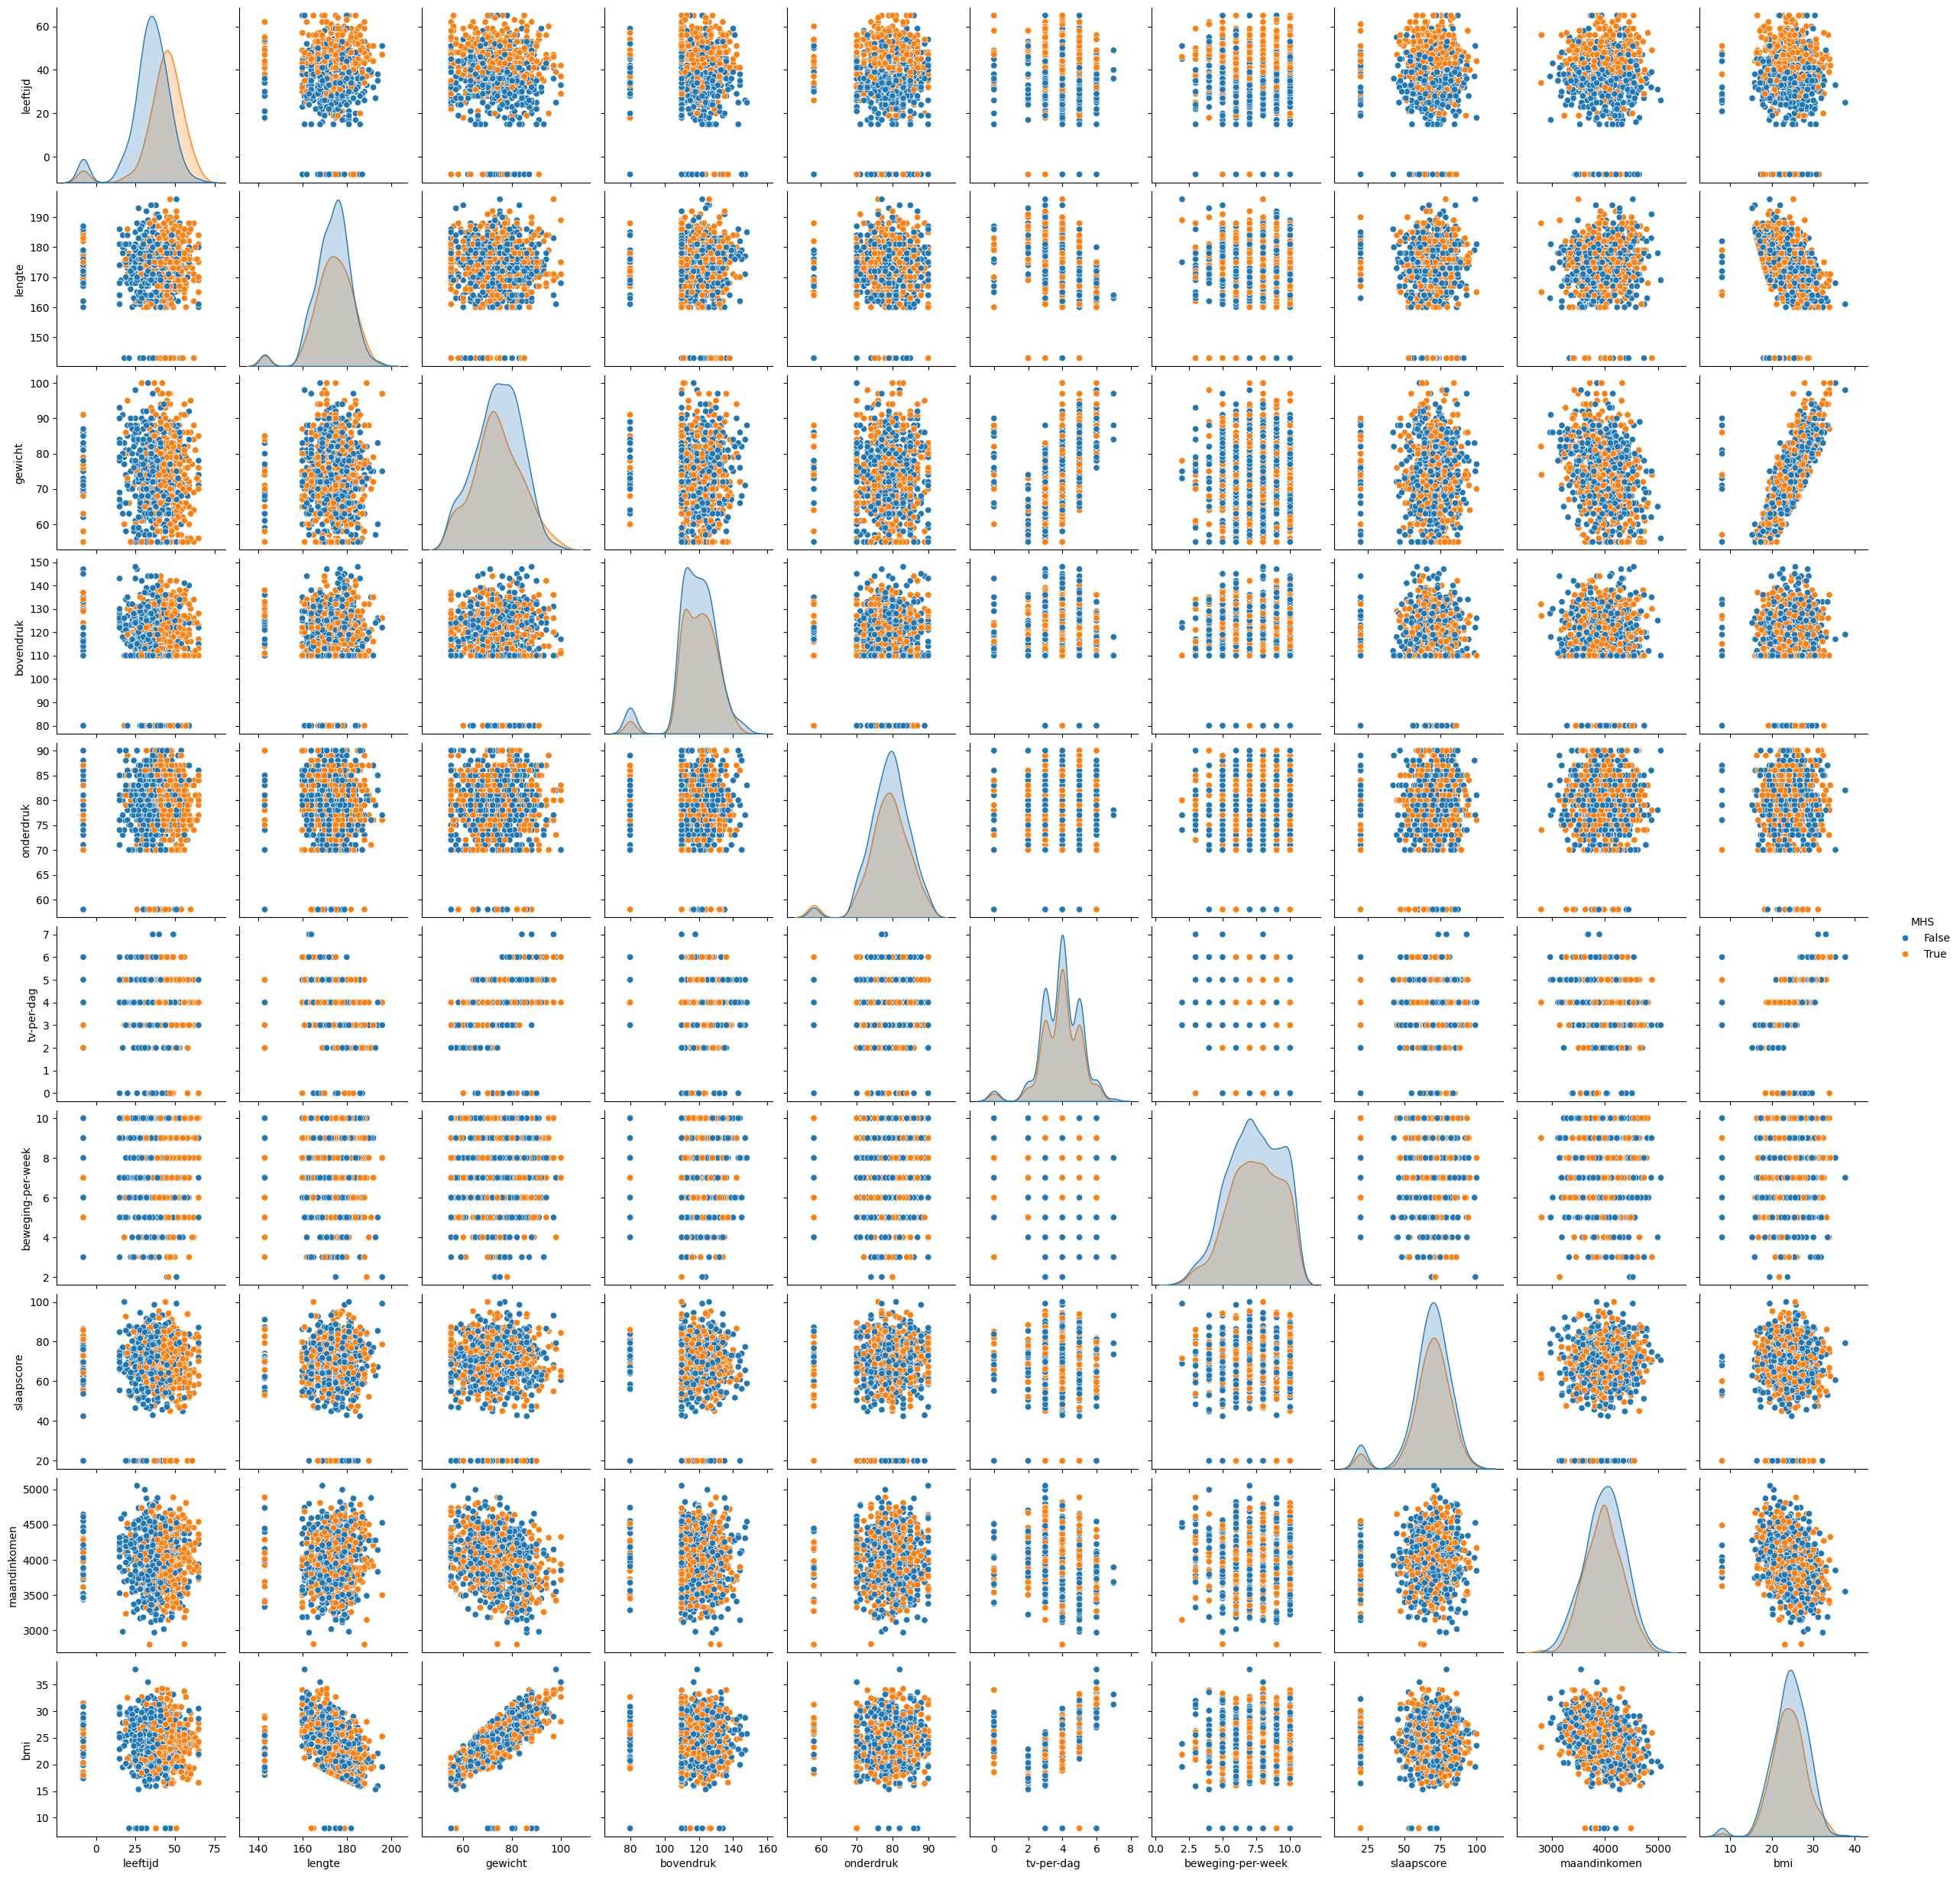

In [76]:
nummeric_collumn = ["leeftijd", "lengte","gewicht", "bovendruk", "onderdruk", "tv-per-dag","beweging-per-week","slaapscore","maandinkomen","bmi","MHS"]
sns.pairplot(data[nummeric_collumn],hue= "MHS")


onehotencoding

In [77]:

nummeric_collumn.append("astigmatisme")
nummeric_collumn.append("hypertensie")

In [185]:
from sklearn.preprocessing import OneHotEncoder
#dataset = csv.drop(columns="Disease", axis=1, inplace=True)
# encode frame
catagorical_frame = data.loc[:, catagory_cols]

encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
encoded_data = encoder.fit_transform(catagorical_frame)
original_columns = data.loc[:,nummeric_collumn]
training_data = pd.concat([original_columns, encoded_data], axis=1)
x_col = training_data.columns.drop("MHS")
#print(x_col)
x_data = training_data.loc[:,x_col].to_numpy()
#print(x_data.head())
y_data = training_data["MHS"].to_numpy()
#training_data.head()
#y_data

In [191]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

# Imputeer NA's:

feature_imputer = SimpleImputer(strategy='most_frequent')
feature_imputer.fit(x_data)
X_data_imputed = feature_imputer.transform(x_data)
print(X_data_imputed.shape)
print(training_data.shape)
#X_test_imputed = feature_imputer.transform(X_test_not_imputed)
#X_data_imputed

#target_imputer = SimpleImputer(strategy='most_frequent')
#y_data_imputed = target_imputer.fit_transform(y_data.values.reshape(-1, 1)).ravel()
#y_test = target_imputer.transform(y_test_not_imputed.values.reshape(-1, 1)).ravel()

(960, 17)
(960, 18)


In [114]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KDTree
from sklearn.neighbors import BallTree
from sklearn import svm
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.neural_network import MLPClassifier

models = [DummyClassifier, DecisionTreeClassifier, GaussianNB, KNeighborsClassifier, RandomForestClassifier, SGDClassifier, BernoulliNB, MLPClassifier]

In [136]:
from sklearn.model_selection import cross_validate
score_results = {}

for model in models:
    scores = cross_validate(model(), X_data_imputed, y_data, return_train_score=True)
    for key, val in scores.items():
        scores[key] = val.mean()
    score_results[f"{model.__name__}"] = scores

pd.DataFrame(score_results).T

,fit_time,score_time,test_score,train_score
DummyClassifier,0.000932,0.001060,0.565625,0.565625
DecisionTreeClassifier,0.011395,0.001606,0.577083,1.000000
GaussianNB,0.002375,0.001213,0.645833,0.682031
KNeighborsClassifier,0.001457,0.024600,0.628125,0.755208
RandomForestClassifier,0.341075,0.013482,0.672917,1.000000
SGDClassifier,0.009496,0.001299,0.529167,0.536458
BernoulliNB,0.002766,0.001345,0.540625,0.561458
MLPClassifier,0.186640,0.001234,0.559375,0.561458


In [137]:
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=12).fit(X_data_imputed, y_data)
print(len(selector.scores_))
print(len(x_col))
pd.DataFrame({"Attribute": x_col, "Score": selector.scores_}).sort_values("Score", ascending=False).set_index("Attribute")

17
17


,Score
Attribute,
leeftijd,101.963444
bovendruk,2.511894
opleidingsniveau_HBO/WO,2.295452
opleidingsniveau_HAVO/VWO/MBO2,0.856691
hypertensie,0.738606
lengte,0.628462
slaapscore,0.602511
onderdruk,0.545895
opleidingsniveau_Basisonderwijs/MBO1,0.370519


alles onder maandinkomen weg

In [140]:
metric_scores = {}
k = 14
while k:
    X_select = SelectKBest(k=k).fit_transform(X_data_imputed, y_data)
    scores = cross_validate(RandomForestClassifier(), X_select, y_data, return_train_score=True)
    for key, val in scores.items():
        scores[key] = val.mean()
    metric_scores[f"{k} features"] = scores
    k -= 1

pd.DataFrame(metric_scores).T

,fit_time,score_time,test_score,train_score
14 features,0.172618,0.007446,0.647917,1.000000
13 features,0.173744,0.008332,0.675000,1.000000
12 features,0.174505,0.007583,0.659375,1.000000
11 features,0.179583,0.007335,0.661458,1.000000
10 features,0.166281,0.007291,0.677083,1.000000
9 features,0.156838,0.007341,0.654167,1.000000
8 features,0.145273,0.007323,0.664583,1.000000
7 features,0.148710,0.007490,0.639583,1.000000
6 features,0.134690,0.007463,0.637500,0.997656
5 features,0.130196,0.007396,0.618750,0.954688


In [171]:
feature_col = training_data.columns.drop("MHS")
feature_col = training_data.columns.drop("leeftijd")
#feature_col = training_data.columns.drop("MHS")
#feature_col = training_data.columns.drop("MHS")
print(feature_col)

Index(['lengte', 'gewicht', 'bovendruk', 'onderdruk', 'tv-per-dag',
       'beweging-per-week', 'slaapscore', 'maandinkomen', 'bmi', 'MHS',
       'astigmatisme', 'hypertensie', 'opleidingsniveau_Basisonderwijs/MBO1',
       'opleidingsniveau_HAVO/VWO/MBO2', 'opleidingsniveau_HBO/WO', 'sex_M',
       'sex_V'],
      dtype='object')


In [172]:
feature_col = training_data.columns.drop("MHS")
feature_col = training_data.columns.drop("leeftijd")
x_feature_data = training_data.loc[:,feature_col].to_numpy()

y_feature_data = training_data["MHS"].to_numpy()
feature_imputer = SimpleImputer(strategy='most_frequent')
feature_imputer.fit(x_data)

X_feuture_imputed = feature_imputer.transform(x_feature_data)

In [173]:
for model in models:
    scores = cross_validate(model(),X_feuture_imputed, y_feature_data, return_train_score=True)
    for key, val in scores.items():
        scores[key] = val.mean()
    score_results[f"{model.__name__}"] = scores

pd.DataFrame(score_results).T

,fit_time,score_time,test_score,train_score
DummyClassifier,0.000434,0.000477,0.565625,0.565625
DecisionTreeClassifier,0.001823,0.000779,1.000000,1.000000
GaussianNB,0.001298,0.000715,1.000000,1.000000
KNeighborsClassifier,0.000863,0.008767,0.553125,0.697917
RandomForestClassifier,0.128831,0.006337,1.000000,1.000000
SGDClassifier,0.004935,0.000658,0.488542,0.490104
BernoulliNB,0.001452,0.000717,1.000000,1.000000
MLPClassifier,0.159359,0.000761,0.604167,0.610156


In [178]:
from sklearn.feature_selection import SelectKBest
feature_col = training_data.columns.drop("MHS")
feature_col = training_data.columns.drop("leeftijd")
selector = SelectKBest(k=12).fit(X_feuture_imputed, y_feature_data)
print(len(selector.scores_))
print(feature_col)
pd.DataFrame({"Attribute": feature_col, "Score": selector.scores_}).sort_values("Score", ascending=False).set_index("Attribute")

17
Index(['lengte', 'gewicht', 'bovendruk', 'onderdruk', 'tv-per-dag',
       'beweging-per-week', 'slaapscore', 'maandinkomen', 'bmi', 'MHS',
       'astigmatisme', 'hypertensie', 'opleidingsniveau_Basisonderwijs/MBO1',
       'opleidingsniveau_HAVO/VWO/MBO2', 'opleidingsniveau_HBO/WO', 'sex_M',
       'sex_V'],
      dtype='object')


/home/ivar-lottman/miniforge3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


,Score
Attribute,
MHS,inf
opleidingsniveau_HBO/WO,2.295452
maandinkomen,1.073961
bovendruk,1.019775
opleidingsniveau_HAVO/VWO/MBO2,0.856691
hypertensie,0.738606
lengte,0.628462
slaapscore,0.602511
onderdruk,0.545895
